<a href="https://colab.research.google.com/github/zongming03/Feature-Engineering/blob/main/IndividualAssignment_WIE3007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install featuretools

In [ ]:
import featuretools as ft
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

##Load Dataset

In [ ]:
# Create DataFrames for customers, products, orders, and order details

customers = {
    "CustomerID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "Name": ['John Doe', 'Jane Smith', 'Mike Jordan', 'Emma Stone', 'Chris Evans', 'Alice Brown', 'Bob Johnson', 'Charlie Davis', 'David Garcia', 'Emily Wilson'],
    "Email": ['john.doe@example.com', 'jane.smith@example.com', 'mike.jordan@example.com', 'emma.stone@example.com', 'chris.evans@example.com',
              'alice.brown@example.com', 'bob.johnson@example.com', 'charlie.davis@example.com', 'david.garcia@example.com', 'emily.wilson@example.com'],
    "SignupDate": ['2023-01-10', '2023-01-15', '2023-01-20', '2023-02-01', '2023-02-05', '2023-02-10', '2023-02-15', '2023-02-20', '2023-03-01', '2023-03-05']
}

products = {
    'ProductID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'Name': ['Laptop', 'Tablet', 'Smartphone', 'Headphones', 'Smartwatch', 'Mouse', 'Keyboard', 'Monitor', 'Printer', 'Webcam'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Accessories', 'Electronics', 'Accessories', 'Accessories', 'Electronics', 'Electronics', 'Accessories'],
    'Price': [1000, 500, 800, 200, 300, 50, 100, 300, 250, 150]
}

orders = {
    "OrderID": [301, 302, 303, 304, 305, 306, 307, 308, 309, 310],
    "CustomerID": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    "OrderDate": ['2023-02-01', '2023-02-05', '2023-02-10', '2023-02-12', '2023-02-15', '2023-02-20', '2023-02-22',
                  '2023-03-01', '2023-03-05', '2023-03-10'],
    "ShipDate": ['2023-02-03', '2023-02-07', '2023-02-12', '2023-02-14', '2023-02-17', '2023-02-22', '2023-02-25',
                 '2023-03-03', '2023-03-07', '2023-03-12']
}

order_details = {
    "OrderID": [301, 302, 303, 304, 305, 306, 307, 308, 309, 310],
    "ProductID": [201, 202, 203, 204, 205, 203, 207, 208, 209, 201],
    "Quantity": [2, 10, 1, 32, 1, 10, 1, 50, 2, 1],
    "Discount": [0, 0.1, 0, 0, 0, 0, 0, 0.15, 0, 0]
}

customers_df = pd.DataFrame(customers)
products_df = pd.DataFrame(products)
orders_df = pd.DataFrame(orders)
order_details_df = pd.DataFrame(order_details)

# Convert to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
orders_df['OrderDate'] = pd.to_datetime(orders_df['OrderDate'])
orders_df['ShipDate'] = pd.to_datetime(orders_df['ShipDate'])

# Adding a combined key in the order details
order_details_df['OrderDetailsID'] = order_details_df['OrderID'].astype(str) + '_' + order_details_df['ProductID'].astype(str)


In [ ]:
display(customers_df)
display(products_df)
display(orders_df)
display(order_details_df)

,CustomerID,Name,Email,SignupDate
0,101,John Doe,john.doe@example.com,2023-01-10
1,102,Jane Smith,jane.smith@example.com,2023-01-15
2,103,Mike Jordan,mike.jordan@example.com,2023-01-20
3,104,Emma Stone,emma.stone@example.com,2023-02-01
4,105,Chris Evans,chris.evans@example.com,2023-02-05
5,106,Alice Brown,alice.brown@example.com,2023-02-10
6,107,Bob Johnson,bob.johnson@example.com,2023-02-15
7,108,Charlie Davis,charlie.davis@example.com,2023-02-20
8,109,David Garcia,david.garcia@example.com,2023-03-01
9,110,Emily Wilson,emily.wilson@example.com,2023-03-05


,ProductID,Name,Category,Price
0,201,Laptop,Electronics,1000
1,202,Tablet,Electronics,500
2,203,Smartphone,Electronics,800
3,204,Headphones,Accessories,200
4,205,Smartwatch,Electronics,300
5,206,Mouse,Accessories,50
6,207,Keyboard,Accessories,100
7,208,Monitor,Electronics,300
8,209,Printer,Electronics,250
9,210,Webcam,Accessories,150


,OrderID,CustomerID,OrderDate,ShipDate
0,301,101,2023-02-01,2023-02-03
1,302,102,2023-02-05,2023-02-07
2,303,103,2023-02-10,2023-02-12
3,304,104,2023-02-12,2023-02-14
4,305,105,2023-02-15,2023-02-17
5,306,106,2023-02-20,2023-02-22
6,307,107,2023-02-22,2023-02-25
7,308,108,2023-03-01,2023-03-03
8,309,109,2023-03-05,2023-03-07
9,310,110,2023-03-10,2023-03-12


,OrderID,ProductID,Quantity,Discount,OrderDetailsID
0,301,201,2,0.00,301_201
1,302,202,10,0.10,302_202
2,303,203,1,0.00,303_203
3,304,204,32,0.00,304_204
4,305,205,1,0.00,305_205
5,306,203,10,0.00,306_203
6,307,207,1,0.00,307_207
7,308,208,50,0.15,308_208
8,309,209,2,0.00,309_209
9,310,201,1,0.00,310_201


In [ ]:
# Check for missing values in each DataFrame
print(customers_df.isnull().sum())
print(products_df.isnull().sum())
print(orders_df.isnull().sum())
print(order_details_df.isnull().sum())

# Check the data types
print(customers_df.dtypes)
print(products_df.dtypes)
print(orders_df.dtypes)
print(order_details_df.dtypes)

CustomerID    0
Name          0
Email         0
SignupDate    0
dtype: int64
ProductID    0
Name         0
Category     0
Price        0
dtype: int64
OrderID       0
CustomerID    0
OrderDate     0
ShipDate      0
dtype: int64
OrderID           0
ProductID         0
Quantity          0
Discount          0
OrderDetailsID    0
dtype: int64
CustomerID             int64
Name                  object
Email                 object
SignupDate    datetime64[ns]
dtype: object
ProductID     int64
Name         object
Category     object
Price         int64
dtype: object
OrderID                int64
CustomerID             int64
OrderDate     datetime64[ns]
ShipDate      datetime64[ns]
dtype: object
OrderID             int64
ProductID           int64
Quantity            int64
Discount          float64
OrderDetailsID     object
dtype: object


In [ ]:
# Merge order_details with products to get price
merged_order_details = order_details_df.merge(products_df[['ProductID', 'Price']], on='ProductID')

# Calculate TotalPrice and add it to the merged DataFrame
merged_order_details['TotalPrice'] = merged_order_details['Price'] * merged_order_details['Quantity']

# Update the original order_details_df with TotalPrice
order_details_df['TotalPrice'] = merged_order_details['TotalPrice']
print(order_details_df)

   OrderID  ProductID  Quantity  Discount OrderDetailsID  TotalPrice
0      301        201         2      0.00        301_201        2000
1      302        202        10      0.10        302_202        5000
2      303        203         1      0.00        303_203         800
3      304        204        32      0.00        304_204        6400
4      305        205         1      0.00        305_205         300
5      306        203        10      0.00        306_203        8000
6      307        207         1      0.00        307_207         100
7      308        208        50      0.15        308_208       15000
8      309        209         2      0.00        309_209         500
9      310        201         1      0.00        310_201        1000


## Entity Set

In [ ]:
# creating entity set 'entitySet'
entitySet = ft.EntitySet(id="e-commerce_es")

#Add DataFrame to the EntitySet
#Customers
customers_entity = entitySet.add_dataframe(
    dataframe=customers_df,  #  Dataframe containing the data.
    dataframe_name='Customers',  # Unique name to associate with this dataframe
    index='CustomerID',  # Unique identifier
    time_index='SignupDate'
)

#Products
products_entity = entitySet.add_dataframe(
    dataframe=products_df,
    dataframe_name='Products',
    index='ProductID'
)

#Orders
orders_entity = entitySet.add_dataframe(
    dataframe=orders_df,
    dataframe_name='Orders',
    index='OrderID' ,
    time_index='OrderDate',
)

#OrdersDetails
orderDetails_entity = entitySet.add_dataframe(
    dataframe=order_details_df,
    dataframe_name='OrderDetails',
    index='OrderDetailsID'
)

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

In [ ]:
print(entitySet)

Entityset: e-commerce_es
  DataFrames:
    Customers [Rows: 10, Columns: 4]
    Products [Rows: 10, Columns: 4]
    Orders [Rows: 10, Columns: 4]
    OrderDetails [Rows: 10, Columns: 6]
  Relationships:
    No relationships


####Establish relationship

In [ ]:
# Define relationships
entitySet.add_relationship(parent_dataframe_name='Customers', parent_column_name='CustomerID',
                    child_dataframe_name='Orders', child_column_name='CustomerID')

entitySet.add_relationship(parent_dataframe_name='Products', parent_column_name='ProductID',
                    child_dataframe_name='OrderDetails', child_column_name='ProductID')

entitySet.add_relationship(parent_dataframe_name='Orders', parent_column_name='OrderID',
                    child_dataframe_name='OrderDetails', child_column_name='OrderID')

Entityset: e-commerce_es
  DataFrames:
    Customers [Rows: 10, Columns: 4]
    Products [Rows: 10, Columns: 4]
    Orders [Rows: 10, Columns: 4]
    OrderDetails [Rows: 10, Columns: 6]
  Relationships:
    Orders.CustomerID -> Customers.CustomerID
    OrderDetails.ProductID -> Products.ProductID
    OrderDetails.OrderID -> Orders.OrderID

####Check entity

In [ ]:
print(entitySet)

Entityset: e-commerce_es
  DataFrames:
    Customers [Rows: 10, Columns: 4]
    Products [Rows: 10, Columns: 4]
    Orders [Rows: 10, Columns: 4]
    OrderDetails [Rows: 10, Columns: 6]
  Relationships:
    Orders.CustomerID -> Customers.CustomerID
    OrderDetails.ProductID -> Products.ProductID
    OrderDetails.OrderID -> Orders.OrderID


#Deep Feature Synthesis (DFS)

In [ ]:
  # Generate features with DFS for Orders fact table
  feature_matrix, feature_defs = ft.dfs(
      entityset=entitySet,
      target_dataframe_name="Orders",
      verbose=True,
      max_depth=3,
      agg_primitives=['sum', 'mean', 'count', 'max', 'min','mode'],
      trans_primitives=['month', 'day', 'year']
  )

Built 137 features
Elapsed: 00:00 | Progress:  31%|███       

/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x7ebdd1fe4700> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(to_agg)
/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x7ebdd1fe4820> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
/usr/local/lib/python3.10/dist-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function sum at 0x7ebdd1fe40d0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will b

Elapsed: 00:00 | Progress: 100%|██████████


In [ ]:
# Display the entire feature matrix
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
print(feature_matrix)


         CustomerID  COUNT(OrderDetails)  MAX(OrderDetails.Discount)  \
OrderID                                                                
301             101                    1                        0.00   
302             102                    1                        0.10   
303             103                    1                        0.00   
304             104                    1                        0.00   
305             105                    1                        0.00   
306             106                    1                        0.00   
307             107                    1                        0.00   
308             108                    1                        0.15   
309             109                    1                        0.00   
310             110                    1                        0.00   

         MAX(OrderDetails.Quantity)  MAX(OrderDetails.TotalPrice)  \
OrderID                                                           

In [ ]:
for column in feature_matrix.columns:
    print(column)

CustomerID
COUNT(OrderDetails)
MAX(OrderDetails.Discount)
MAX(OrderDetails.Quantity)
MAX(OrderDetails.TotalPrice)
MEAN(OrderDetails.Discount)
MEAN(OrderDetails.Quantity)
MEAN(OrderDetails.TotalPrice)
MIN(OrderDetails.Discount)
MIN(OrderDetails.Quantity)
MIN(OrderDetails.TotalPrice)
SUM(OrderDetails.Discount)
SUM(OrderDetails.Quantity)
SUM(OrderDetails.TotalPrice)
DAY(OrderDate)
DAY(ShipDate)
MONTH(OrderDate)
MONTH(ShipDate)
YEAR(OrderDate)
YEAR(ShipDate)
MAX(OrderDetails.Products.Price)
MEAN(OrderDetails.Products.Price)
MIN(OrderDetails.Products.Price)
MODE(OrderDetails.Products.Category)
SUM(OrderDetails.Products.Price)
Customers.COUNT(Orders)
Customers.COUNT(OrderDetails)
Customers.MAX(OrderDetails.Discount)
Customers.MAX(OrderDetails.Quantity)
Customers.MAX(OrderDetails.TotalPrice)
Customers.MEAN(OrderDetails.Discount)
Customers.MEAN(OrderDetails.Quantity)
Customers.MEAN(OrderDetails.TotalPrice)
Customers.MIN(OrderDetails.Discount)
Customers.MIN(OrderDetails.Quantity)
Customers.MIN(

In [ ]:
print(feature_defs)

[<Feature: CustomerID>, <Feature: COUNT(OrderDetails)>, <Feature: MAX(OrderDetails.Discount)>, <Feature: MAX(OrderDetails.Quantity)>, <Feature: MAX(OrderDetails.TotalPrice)>, <Feature: MEAN(OrderDetails.Discount)>, <Feature: MEAN(OrderDetails.Quantity)>, <Feature: MEAN(OrderDetails.TotalPrice)>, <Feature: MIN(OrderDetails.Discount)>, <Feature: MIN(OrderDetails.Quantity)>, <Feature: MIN(OrderDetails.TotalPrice)>, <Feature: SUM(OrderDetails.Discount)>, <Feature: SUM(OrderDetails.Quantity)>, <Feature: SUM(OrderDetails.TotalPrice)>, <Feature: DAY(OrderDate)>, <Feature: DAY(ShipDate)>, <Feature: MONTH(OrderDate)>, <Feature: MONTH(ShipDate)>, <Feature: YEAR(OrderDate)>, <Feature: YEAR(ShipDate)>, <Feature: MAX(OrderDetails.Products.Price)>, <Feature: MEAN(OrderDetails.Products.Price)>, <Feature: MIN(OrderDetails.Products.Price)>, <Feature: MODE(OrderDetails.Products.Category)>, <Feature: SUM(OrderDetails.Products.Price)>, <Feature: Customers.COUNT(Orders)>, <Feature: Customers.COUNT(OrderDet

#Insight

Highest Quantity Ordered Per Order

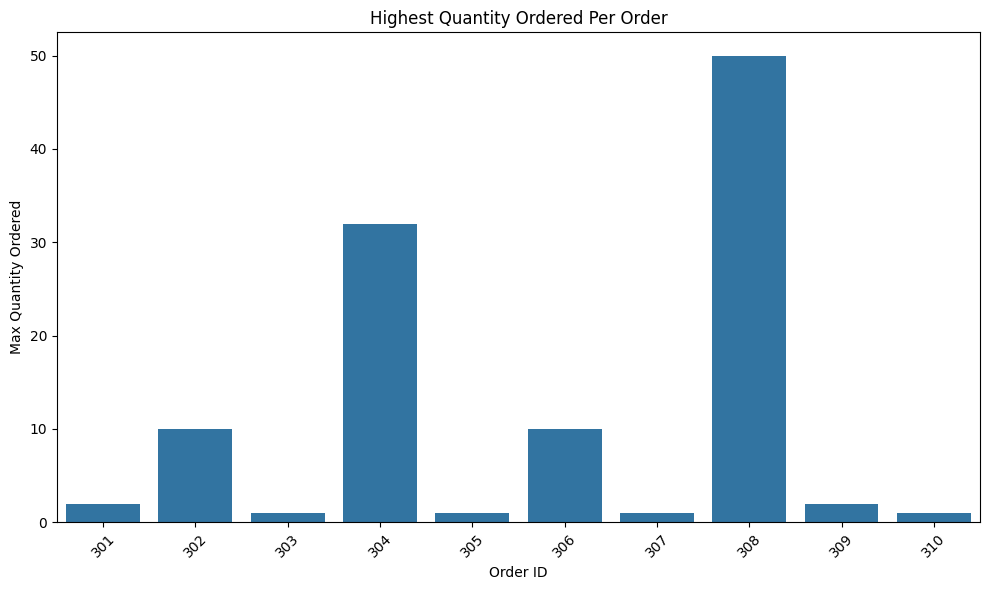

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_matrix.index, y='MAX(OrderDetails.Quantity)', data=feature_matrix)
plt.xticks(rotation=45)
plt.title("Highest Quantity Ordered Per Order")
plt.xlabel("Order ID")
plt.ylabel("Max Quantity Ordered")
plt.tight_layout()
plt.show()

 Total Price Per Order

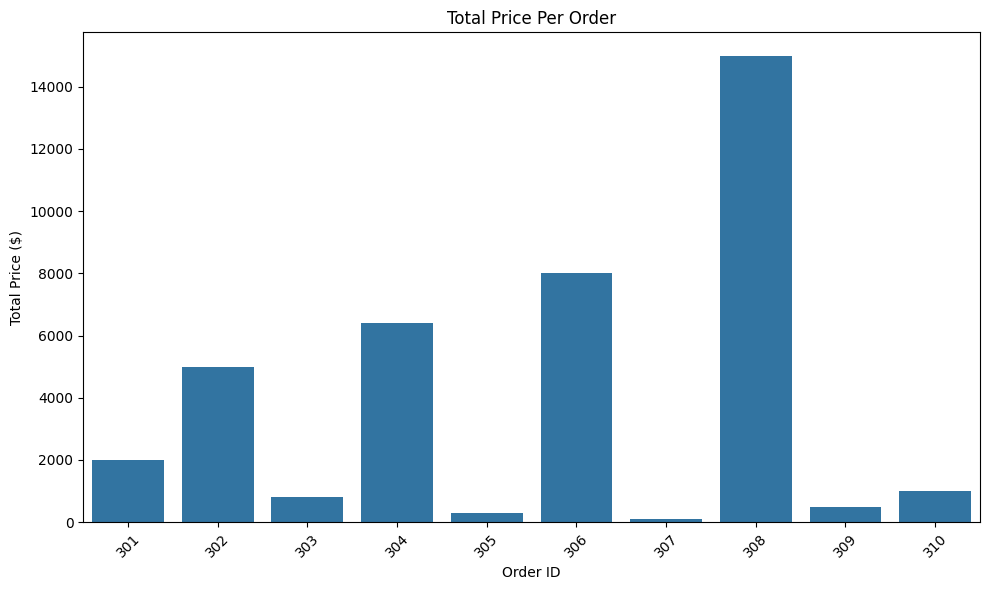

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_matrix.index, y='SUM(OrderDetails.TotalPrice)', data=feature_matrix)
plt.xticks(rotation=45)
plt.title("Total Price Per Order")
plt.xlabel("Order ID")
plt.ylabel("Total Price ($)")
plt.tight_layout()
plt.show()

 Most Common Product Category Ordered

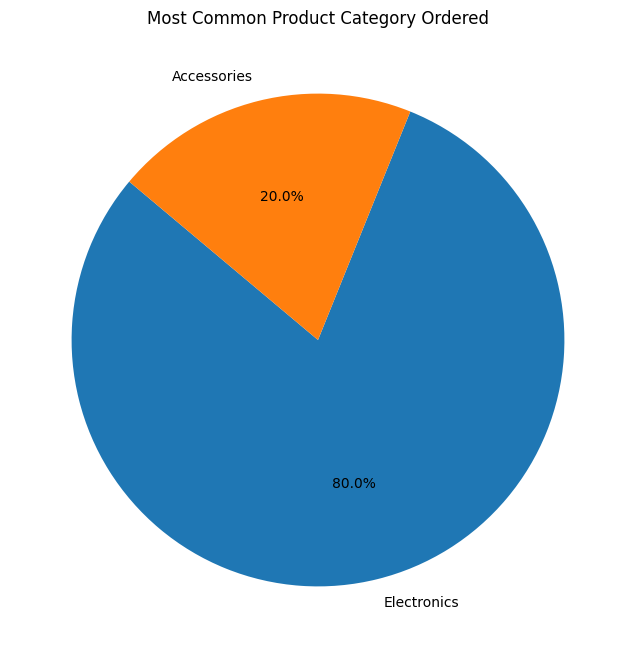

In [ ]:
# Count occurrences of each product category
category_counts = feature_matrix["MODE(OrderDetails.Products.Category)"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Most Common Product Category Ordered")
plt.show()

 Average Quantity Per Order

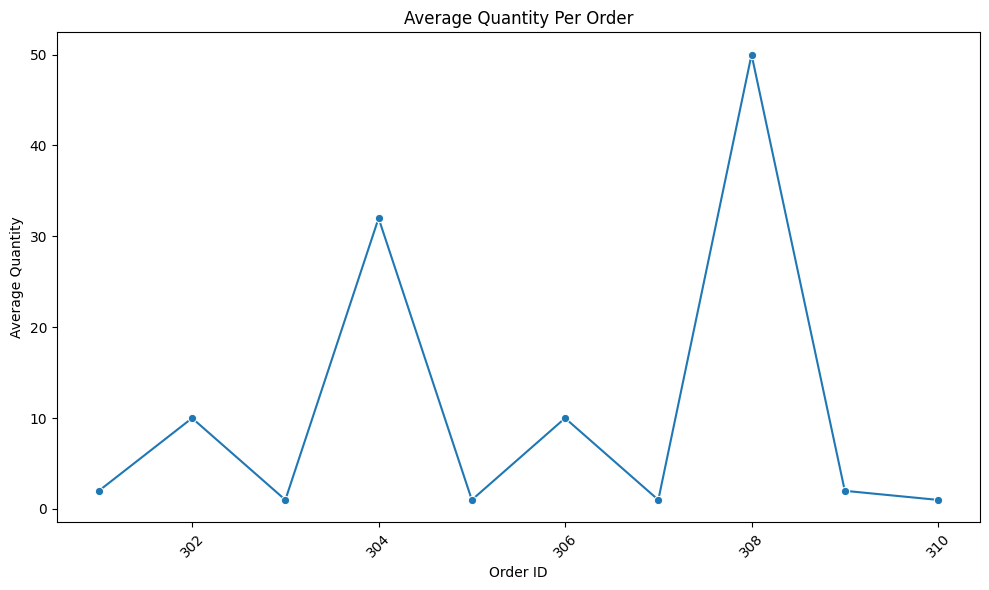

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=feature_matrix.index, y='MEAN(OrderDetails.Quantity)', data=feature_matrix, marker='o')
plt.xticks(rotation=45)
plt.title("Average Quantity Per Order")
plt.xlabel("Order ID")
plt.ylabel("Average Quantity")
plt.tight_layout()
plt.show()

In [ ]:
feature_matrix.to_csv('feature_matrix.csv', index=False)